In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cv_show(name,img):
    cv.imshow(name,img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [3]:
def plt_show(name,img1,img2):
    plt.figure(figsize = (10,10))
    plt.subplot(121);plt.imshow(img1,cmap='gray');plt.title(name)
    plt.subplot(122);plt.imshow(img2,cmap='gray');plt.title('Oringal')
    plt.show()

In [4]:
def plt_show1(name,img1,img2):
    plt.figure(figsize = (10,10))
    plt.subplot(121);plt.imshow(img1);plt.title(name)
    plt.subplot(122);plt.imshow(img2);plt.title('Oringal')
    plt.show()

In [5]:
grey = cv2.imread('test.jpg',cv2.IMREAD_GRAYSCALE)
#一个小检查
if grey.data == None:
    print("No such file")

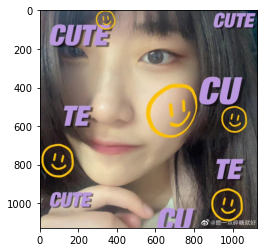

In [6]:
img = cv2.imread('test.jpg')
img = np.flip(img,2)
plt.imshow(img)

### Images Binarization

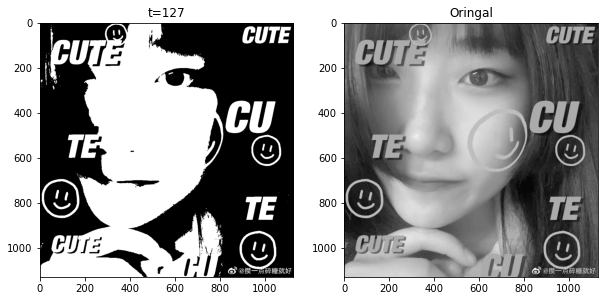

In [29]:
#binarization
I = cv2.imread('test.jpg',cv2 . IMREAD_GRAYSCALE)
t = 127
ret , Inew = cv2.threshold (I , t , 255 ,cv2 . THRESH_BINARY )
plt_show('t=127',Inew,I)

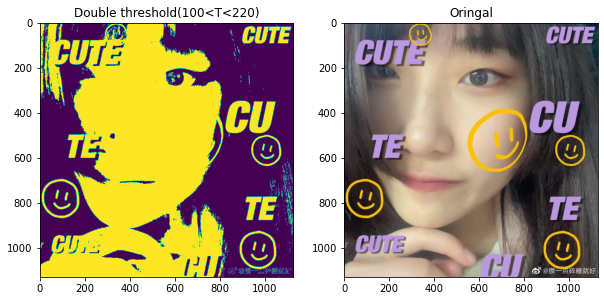

In [32]:
#Double threshold binarization
I = img
t1 = 100
t2 = 220
Igray = cv2 . cvtColor (I , cv2 . COLOR_BGR2GRAY )
ret , Inew = cv2 . threshold ( Igray , t2 , 255 ,cv2 . THRESH_TOZERO_INV )
ret , Inew = cv2 . threshold ( Inew , t1 , 255 ,cv2 . THRESH_BINARY )
plt_show1('Double threshold(100<T<220)',Inew,I)

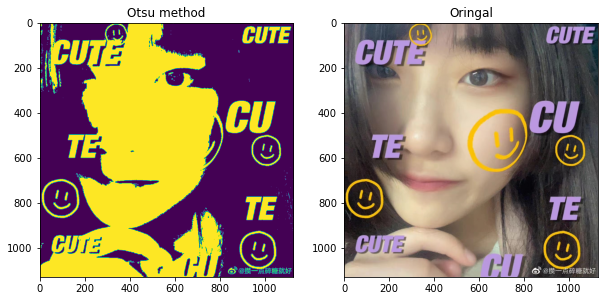

In [9]:
# Otsu Method
I = img
Igray = cv2 . cvtColor (I , cv2 . COLOR_BGR2GRAY )
ret , Inew = cv2 . threshold ( Igray , 0 , 255 ,cv2 . THRESH_OTSU )
plt_show1('Otsu method',Inew,I)

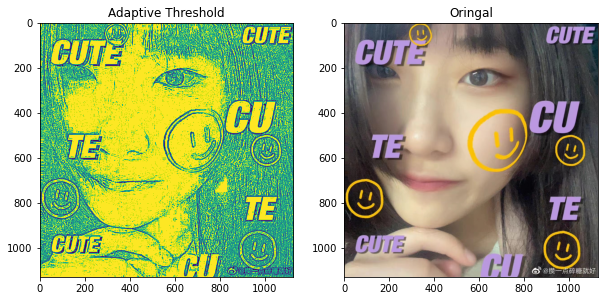

In [10]:
#Adaptive Threshold
I = img
Igray = cv2 . cvtColor (I , cv2 . COLOR_BGR2GRAY )
Inew = cv2 . adaptiveThreshold ( Igray , 255 ,cv2 . ADAPTIVE_THRESH_GAUSSIAN_C ,
                                cv2 . THRESH_BINARY , 11 , 2)
plt_show1('Adaptive Threshold',Inew,I)

### Images Segmentation

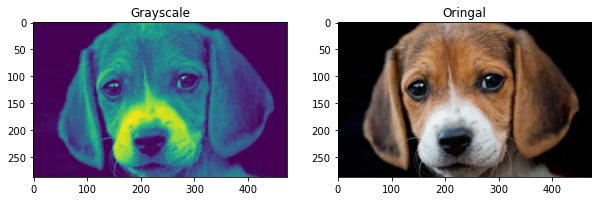

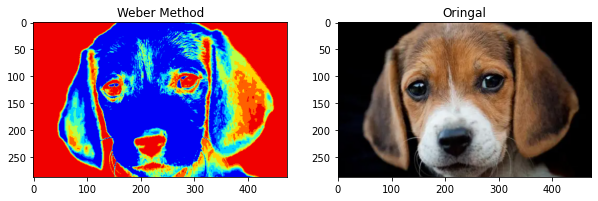

In [15]:
def weber(Imin):

    if (Imin >= 0 and Imin <= 88):
        return 20 - 12 * Imin / 88
    elif (Imin > 88 and Imin <= 138):
        return 2 * (Imin - 88) ** 2
    else:
        return  7 * (Imin - 138) / 117 + 13

def WeberSegmentation(fn="test.jpg"):
    I = cv2.imread(fn, cv2.IMREAD_COLOR)
    I = np.flip(I,2)
    if not isinstance(I, np.ndarray) or I.data == None :
        print("Error reading file \"{}\"".format(fn))
        exit()

    #show image
#     plt.imshow(I)

    #convery to grayscale
    Igray=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
#     cv.imshow("Grayscale",Igray)
    plt_show1("Grayscale",Igray,I)

    #Create and empty image and set first label to 1
    Iweber=np.zeros_like(Igray)
    Iweber2=np.zeros_like(Igray)
    n=1

    #For each next minimum calculate the range using Weber function and segment it with same label
    while(Iweber==0).any():
        Imin=Igray[Iweber==0].min()
        Iw=weber(Imin)
        n=n+1
        mask=np.logical_and(Igray>=Imin,Igray<=Imin+Iw)
        Iweber[mask]=n
        Iweber2[mask]=Imin

    #Set first label to be equal to 0 by subtraction 1
    n=n-1
    Iweber=Iweber-1
    
    res = cv2.applyColorMap((Iweber.astype(np.float32)*255/(n+1)).astype(np.uint8),cv2.COLORMAP_JET)
    plt_show1('Weber Method',res,I)
    
    #show image with JET colormap
#     cv.imshow=("Weber segmentation JET",cv.applyColorMap((Iweber.astype(np.float32)*255/(n+1)).astype(np.uint8),cv.COLORMAP_JET))

#     #And with source colors
#     cv.imshow=("Weber segmentation",Iweber2)
#     cv.waitKey()
#     cv.destroyAllWindows()

WeberSegmentation("dog.png")

## Segmentation of RGB images by skin color

In [41]:
def uniform(node):
    R,G,B = node
    if R>95 and G>40 and B >20 and (max(R,G,B)-min(R,G,B))>15 and abs(R-G)>15 and R > G and R > B:
        return True
    return False

def flash(node):
    R,G,B = node
    if R>220 and G>210 and B >170 and abs(R-G)<=15 and G > B and R > B:
        return True
    return False

def normalized(node):
    R,G,B = node
    r = R/(R+G+B)
    g = G/(R+G+B)
    b = B/(R+G+B)
    
    if r/g > 1.185 and r*b/(r+g+b)**2 > 0.107 and r*g/(r+g+b)**2 > 0.112:
        return True
    return False

D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app
D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in ubyte_scalars
  from ipykernel import kernelapp as app
D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in ubyte_scalars
  app.launch_new_instance()
D:\Anaconda\envs\pytorch\lib\si

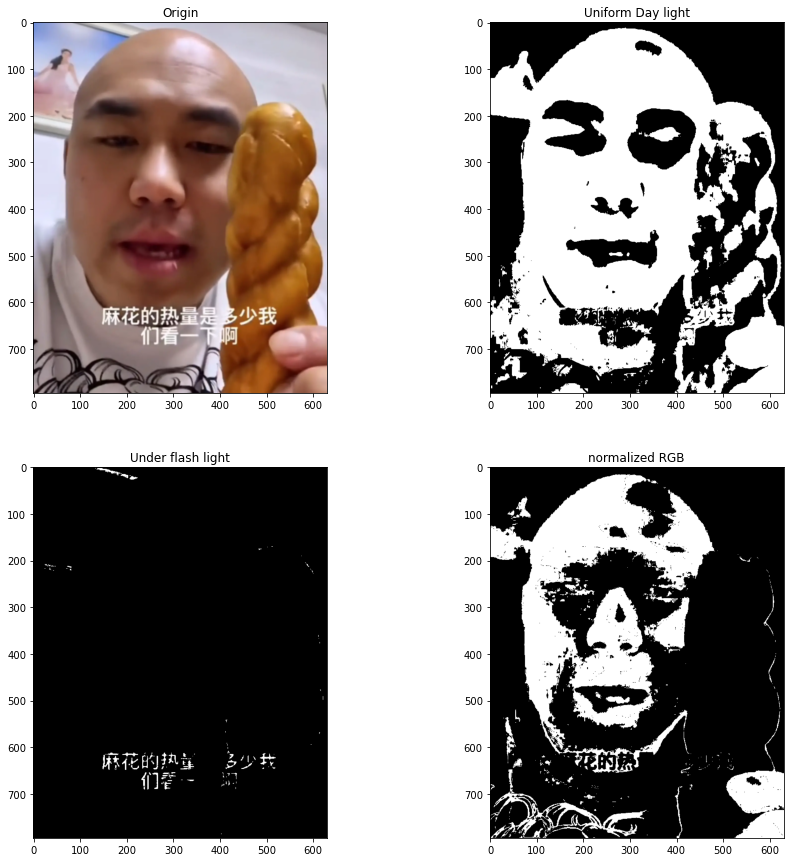

In [60]:
img = cv2.imread ('bold.png' , cv2. IMREAD_COLOR)
img = np.flip(img,2)
row,col = img.shape[:2]
uni = img.copy()
fla = img.copy()
nor = img.copy()


for i in range(row):
    for j in range(col):
        node = img[i][j]
        uni[i][j] = [255,255,255] if uniform(node) else [0,0,0]
        fla[i][j] = [255,255,255] if flash(node) else [0,0,0]
        nor[i][j] = [255,255,255] if normalized(node) else [0,0,0]
        
            
plt.figure(figsize = (15,15))
plt.subplot(221);plt.imshow(img);plt.title('Origin')
plt.subplot(222);plt.imshow(uni);plt.title('Uniform Day light')
plt.subplot(223);plt.imshow(fla);plt.title('Under flash light')
plt.subplot(224);plt.imshow(nor);plt.title('normalized RGB')
plt.show()

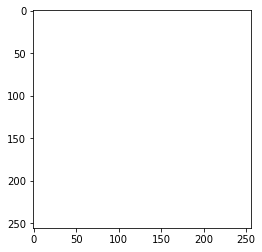

In [12]:
# Based on CIE Lab color space
##  TODO 这里的代码好像有一点问题
I =  cv2.imread ('puff.png' , cv2. IMREAD_COLOR)
Ilab = cv2 . cvtColor (I , cv2 . COLOR_BGR2LAB )
Ilab = cv2 . split ( Ilab )

sampleAreas = []
def MouseHandler( event , x , y , flags , param ):
    if event != cv.EVENT_LBUTTONDBLCLK :
        return
    sampleAreas . append (( x , y ))

# cv . imshow ( " Image " , I )
# cv . setMouseCallback ( 'Image'  , MouseHandler )
# while len ( sampleAreas ) < 3:
#     cv . waitKey (20)
# cv . setMouseCallback ('Image'  ,lambda * args : None )


colorMarks = []
colorMarksBGR = []
for pix in sampleAreas :
    mask = np . zeros_like ( Ilab [0])
    cv2 . circle ( mask , pix , 10 , 255 , -1)
    a = Ilab [1]. mean ( where = mask > 0)
    b = Ilab [2]. mean ( where = mask > 0)
    colorMarks . append (( a , b ))
    colorMarksBGR . append (I[mask > 0,:].mean( axis =(0)))

distance = []
for color in colorMarks :
    distance . append ( np . sqrt (
        np . power ( Ilab [1] - color [0] , 2) +
        np . power ( Ilab [2] - color [1] , 2)))
    distance_min = np . minimum . reduce ( distance )

labels = np . zeros_like ( Ilab [0] ,dtype = np . uint8 )
for i in range ( len ( colorMarks )):
    mask = distance_min == distance [ i ]
    labels [ mask ] = i

segmentedFrames = []
for i in range ( len ( colorMarks )):
    Itmp = np . zeros_like ( I )
    mask = labels == i
    Itmp [ mask ] = I [ mask ]
    segmentedFrames . append ( Itmp )

Iplot = np . full ((256 , 256 , 3) , 255 ,dtype = np . uint8 )
for i in range ( len ( colorMarks )):
    Itmp = np . zeros_like ( I )
    mask = labels == i
    Iplot [ Ilab [1][ mask ] , Ilab [2][ mask ] , :] = \
    colorMarksBGR [ i ]
    
plt.imshow(Iplot)

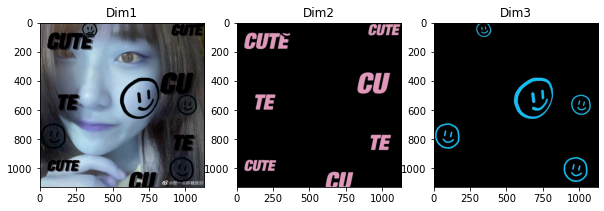

In [13]:
# Base on k-means clustering
I = cv2.imread('test.jpg' ,cv2.IMREAD_COLOR )
# I = np.flip(I,2)
Ilab = cv2.cvtColor (I , cv2.COLOR_BGR2LAB )
Ilab = cv2.split ( Ilab )
# L = Ilab [0]
# a = Ilab [1]
# b = Ilab [2]

ab = cv2 . merge ([ Ilab [1] , Ilab [2]])
ab = ab . reshape ( -1 , 2). astype ( np . float32 )

k = 3
criteria = ( cv2 . TERM_CRITERIA_EPS +cv2 . TERM_CRITERIA_MAX_ITER , 10 , 1.0)
ret , labels , centers = cv2 . kmeans ( ab , k ,None , criteria , 10 ,
                                       cv2 . KMEANS_RANDOM_CENTERS )
labels = labels . reshape (( Ilab [0]. shape ))

segmentedFrames = []
for i in range ( k ):
    Itmp = np . zeros_like ( I )
    mask = labels == i
    Itmp [ mask ] = I [ mask , :]
    segmentedFrames . append ( Itmp )
    

plt.figure(figsize = (10,10))
plt.subplot(131);plt.imshow(segmentedFrames[0]);plt.title('Dim1')
plt.subplot(132);plt.imshow(segmentedFrames[1]);plt.title('Dim2')
plt.subplot(133);plt.imshow(segmentedFrames[2]);plt.title('Dim3')
plt.show()

### Texture segmentation

In [62]:
def bwareaopen (A , dim , conn = 8):
    if A . ndim != 2 or A . dtype != np . uint8 :
        return None
    # Find all connected components
    num , labels , stats , centers = \
    cv2 . connectedComponentsWithStats (A ,connectivity = conn )
    # Check size of all connected components
    for i in range ( num ):
        if stats [i , cv2 . CC_STAT_AREA ] < dim :
            A[ labels == i ] = 0
    return A

In [63]:
def imfillholes ( I ):
    if I . ndim != 2 or I . dtype != np . uint8 :
        return None
    rows , cols = I . shape [0:2]
    mask = I . copy ()
    # Fill mask from all horizontal borders
    for i in range ( cols ):
        if mask [0 , i ] == 0:
            cv2 . floodFill ( mask , None ,(i , 0) , 255 , 10 , 10)
        if mask [ rows - 1 , i ] == 0:
            cv2 . floodFill ( mask , None ,(i , rows - 1) , 255 , 10 , 10)
        
    # Fill mask from all vertical borders
    for i in range ( rows ):
        if mask [i , 0] == 0:
            cv2 . floodFill ( mask , None ,(0 , i ) , 255 , 10 , 10)
        if mask [i , cols - 1] == 0:
            cv2 . floodFill ( mask , None ,( cols - 1 , i ) , 255 , 10 , 10)
        # Use the mask to create a resulting image
        res = I . copy ()
        res [ mask == 0] = 255
        return res

In [68]:
import skimage
I = cv2 . imread ( "beach.jpg" ,cv2 . IMREAD_GRAYSCALE )
E = skimage . filters . rank . entropy (I ,skimage . morphology . square (9)). astype (np . float32 )
Eim = ( E - E . min ()) / ( E . max () - E . min ())
ret , BW1 = cv2 . threshold (np . uint8 ( Eim * 255) , 0 , 255 ,
                             cv2 . THRESH_OTSU )

BWao = bwareaopen(BW1 , 2000)
nhood = cv2 . getStructuringElement (cv2 . MORPH_RECT , (9 , 9))
closeBWao = cv2 . morphologyEx ( BWao ,cv2 . MORPH_CLOSE , nhood )
Mask1 = imfillholes ( closeBWao )

contours , h = cv2 . findContours ( Mask1 ,cv2 . RETR_TREE , cv2 . CHAIN_APPROX_NONE )
boundary = np . zeros_like ( Mask1 )
cv2 . drawContours ( boundary , contours , -1 ,255 , 1)

segmentResults = I . copy ()
segmentResults [ boundary != 0] = 255

I2 = I . copy ()
I2 [ Mask1 != 0] = 0
# Entropy and binarization
E2 = skimage . filters . rank . entropy ( I2 ,skimage . morphology . square (9)). astype (np . float32 )
Eim2 = ( E2 - E2 . min ()) / ( E2 . max () -E2 . min ())
ret , BW2 = cv2 . threshold (np . uint8 ( Eim2 * 255) , 0 , 255 ,cv2 . THRESH_OTSU )

# Filter
BW2ao = bwareaopen ( BW2 , 2000)
nhood = cv2 . getStructuringElement (cv2 . MORPH_RECT , (9 , 9))
closeBW2ao = cv2 . morphologyEx ( BW2ao ,cv2 . MORPH_CLOSE , nhood )
Mask2 = imfillholes ( closeBW2ao )
# Select boundary
contours2 , h = cv2 . findContours ( Mask2 ,cv2 . RETR_TREE , cv2 . CHAIN_APPROX_NONE )
boundary2 = np . zeros_like ( Mask2 )
cv2 . drawContours ( boundary2 , contours2 , -1 ,255 , 1)
segmentResults2 = I2 . copy ()
segmentResults2 [ boundary2 != 0] = 255

texture1 = I . copy ()
texture1 [ Mask2 == 0] = 0
texture2 = I . copy ()
texture2 [ Mask2 != 0] = 0

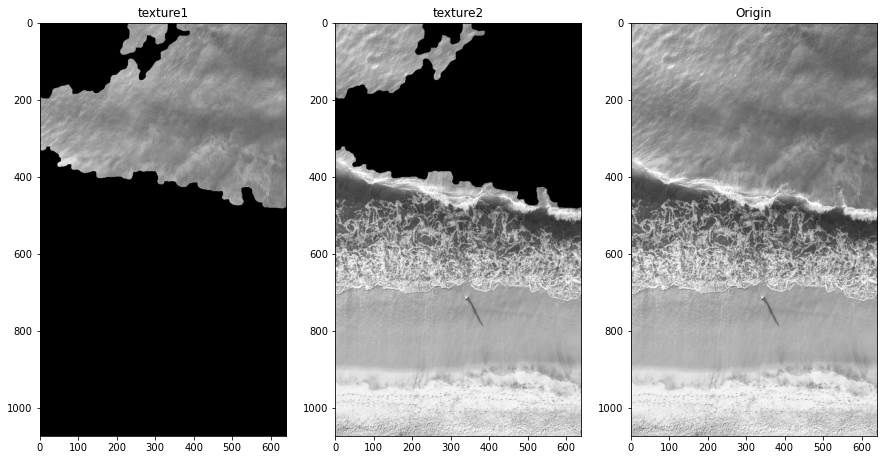

In [69]:
plt.figure(figsize = (15,15))
plt.subplot(131);plt.imshow(texture1,cmap="gray");plt.title('texture1')
plt.subplot(132);plt.imshow(texture2,cmap="gray");plt.title('texture2')
plt.subplot(133);plt.imshow(I,cmap="gray");plt.title('Origin')
plt.show()

In [72]:
I2.shape

(1073, 640)

In [73]:
E2.shape

(1073, 640)

In [74]:
Eim2

array([[0.70753586, 0.6940145 , 0.7132875 , ..., 0.7047963 , 0.69165003,
        0.6965619 ],
       [0.6910451 , 0.6877048 , 0.7142831 , ..., 0.72602123, 0.72158974,
        0.7250236 ],
       [0.6944126 , 0.70458484, 0.7388394 , ..., 0.7637938 , 0.74985945,
        0.73732156],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [102]:
import skimage
I = cv2 . imread ( "beach.jpg" ,cv2 . IMREAD_COLOR )
# E = skimage . filters . rank . entropy (I ,skimage . morphology . square (9)). astype (np . float32 )
E = entropy(I,cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))).astype(np.float32)
Eim = ( E - E . min ()) / ( E . max () - E . min ())
ret , BW1 = cv2 . threshold (np . uint8 ( Eim * 255) , 0 , 255 ,
                             cv2 . THRESH_OTSU )

BWao = bwareaopen(BW1 , 2000)
nhood = cv2 . getStructuringElement (cv2 . MORPH_RECT , (9 , 9))
closeBWao = cv2 . morphologyEx ( BWao ,cv2 . MORPH_CLOSE , nhood )
Mask1 = imfillholes ( closeBWao )

contours , h = cv2 . findContours ( Mask1 ,cv2 . RETR_TREE , cv2 . CHAIN_APPROX_NONE )
boundary = np . zeros_like ( Mask1 )
cv2 . drawContours ( boundary , contours , -1 ,255 , 1)

segmentResults = I . copy ()
segmentResults [ boundary != 0] = 255

I2 = I . copy ()
I2 [ Mask1 != 0] = 0
# Entropy and binarization
# E2 = skimage . filters . rank . entropy ( I2 ,skimage . morphology . square (9)). astype (np . float32 )

E2 = entropy(I2,cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))).astype(np.float32)
Eim2 = ( E2 - E2 . min ()) / ( E2 . max () -E2 . min ())
ret , BW2 = cv2 . threshold (np . uint8 ( Eim2 * 255) , 0 , 255 ,cv2 . THRESH_OTSU )

# Filter
BW2ao = bwareaopen ( BW2 , 2000)
nhood = cv2 . getStructuringElement (cv2 . MORPH_RECT , (9 , 9))
closeBW2ao = cv2 . morphologyEx ( BW2ao ,cv2 . MORPH_CLOSE , nhood )
Mask2 = imfillholes ( closeBW2ao )
# Select boundary
contours2 , h = cv2 . findContours ( Mask2 ,cv2 . RETR_TREE , cv2 . CHAIN_APPROX_NONE )
boundary2 = np . zeros_like ( Mask2 )
cv2 . drawContours ( boundary2 , contours2 , -1 ,255 , 1)
segmentResults2 = I2 . copy ()
segmentResults2 [ boundary2 != 0] = 255

texture1 = I . copy ()
texture1 [ Mask2 == 0] = 0
texture2 = I . copy ()
texture2 [ Mask2 != 0] = 0

AttributeError: 'NoneType' object has no attribute 'astype'

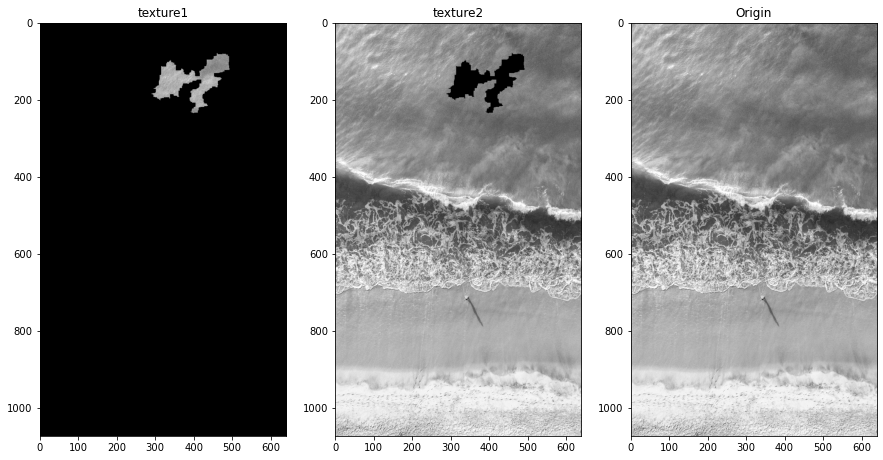

In [90]:
plt.figure(figsize = (15,15))
plt.subplot(131);plt.imshow(texture1,cmap="gray");plt.title('texture1')
plt.subplot(132);plt.imshow(texture2,cmap="gray");plt.title('texture2')
plt.subplot(133);plt.imshow(I,cmap="gray");plt.title('Origin')
plt.show()

In [114]:
def entropy(I,el):
    #Check input image data
    if I.ndim !=2 or I.dtype != np.uint8:
        return None
    #Convert to image with border
    el_rows,el_cols=el.shape
    Icopy=cv2.copyMakeBorder(I,int((el_rows-1)/2),int(el_rows/2),int((el_cols-1)/2),int(el_cols)/2,cv2.BORDER_REPLICATE)

    #Initialize output image
    Iout=np.zeros_like(I,dtype=np.float32)

    #Initialize local gistogram
    hist = np.full((256), 0)
    #Calculate element size
    count = el.sum()

    #For each image pixel-VERY INEFFECTIVE WITH PYTHON
    I_rows,I_cols=I.shape
    for y in range(I_rows):
        for x in range(I_cols):
           # Calculate local histogram
           for i in range(el_rows):
                for j in range(el_cols):
                    if el[i,j]:
                        hist[Icopy[y+i,x+j]]=hist[Icopy[y+i,x+j]]+1
           # Calculate enropy
        val=0
        for i in range(256):
            if hist[i]>0:
                val-=hist[i]/count*log2(hist[i]/count)
                hist[i]=0
        Iout[y,x]=val
    return Iout

In [2]:
img = cv2.imread("beach.jpg",cv2.IMREAD_COLOR)

I = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

E = entropy(I,cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))).astype(np.float32)
Eim = ( E - E . min ()) / ( E . max () - E . min ())

ret , BW1 = cv2 . threshold (np . uint8 ( Eim * 255) , 0 , 255 ,cv2 . THRESH_OTSU )

BWao = bwareaopen ( BW , 2000)
nhood = cv2 . getStructuringElement (cv2 . MORPH_RECT , (9 , 9))
closeBWao = cv2 . morphologyEx ( BWao ,cv2 . MORPH_CLOSE , nhood )
Mask1 = imfillholes ( closeBWao )

contours , h = cv2 . findContours ( Mask1 ,cv2 . RETR_TREE , cv2 . CHAIN_APPROX_NONE )
boundary = np . zeros_like ( Mask1 )
cv2 . drawContours ( boundary , contours , -1 ,255 , 1)

segmentResults = I . copy ()
segmentResults [ boundary != 0] = 255

NameError: name 'cv2' is not defined

## Texture Segmentation

In [26]:
import cv2 as cv
import numpy as np
import os
import skimage
import matplotlib.pyplot as plt
import math
def entropy(I,el):
    #Check input image data
    if I.ndim !=2 or I.dtype != np.uint8:
        return None
    #Convert to image with border
    el_rows,el_cols=el.shape
    Icopy=cv.copyMakeBorder(I,int((el_rows-1)/2),int(el_rows/2),int((el_cols-1)/2),int(el_cols/2),cv.BORDER_REPLICATE)

    #Initialize output image
    Iout=np.zeros_like(I,dtype=np.float32)

    #Initialize local gistogram
    hist = np.full((256), 0)
    #Calculate element size
    count = el.sum()

    #For each image pixel-VERY INEFFECTIVE WITH PYTHON
    I_rows,I_cols=I.shape
    for y in range(I_rows):
        for x in range(I_cols):
           # Calculate local histogram
           for i in range(el_rows):
                for j in range(el_cols):
                    if el[i,j]:
                        hist[Icopy[y+i,x+j]]=hist[Icopy[y+i,x+j]]+1
           # Calculate enropy
           val=0
        for i in range(256):
                if hist[i]>0:
                    #Entropy
                    val-=hist[i]/count*math.log2(hist[i]/count)
                    #Uniformity
#                     val += (hist[i]/count)**2
                    # Mean value
#                     val += i * hist[i]/count
                    hist[i]=0
        Iout[y,x]=val
    return Iout


def imfillholes ( I ):
    if I . ndim != 2 or I . dtype != np . uint8 :
        return None
    rows , cols = I . shape [0:2]
    mask = I . copy ()
    # Fill mask from all horizontal borders
    for i in range ( cols ):
        if mask[0, i] == 0:
            cv . floodFill ( mask , None ,
                (i , 0) , 255 , 10 , 10)
        if mask [ rows - 1 , i ] == 0:
            cv . floodFill ( mask , None ,
                (i , rows - 1) , 255 , 10 , 10)
    # Fill mask from all vertical borders
    for i in range ( rows ):
        if mask [i , 0] == 0:
            cv . floodFill ( mask , None ,
                (0 , i ) , 255 , 10 , 10)
        if mask [i , cols - 1] == 0:
            cv . floodFill ( mask , None ,
                ( cols - 1 , i ) , 255 , 10 , 10)
    # Use the mask to create a resulting image
    res = I . copy ()
    res [ mask == 0] = 255
    return res
#Remove small objects from binary image
def bwareaopen(img:np.ndarray,dim:int,conn:int=8):
    if img.ndim>2:
        return None
    num_labels,labels,stats,centroids=cv.connectedComponentsWithStats(img,connectivity=conn)

    for i in range(num_labels):
        if stats[i,cv.CC_STAT_AREA]<dim:
            img[labels==i]=0
    return img

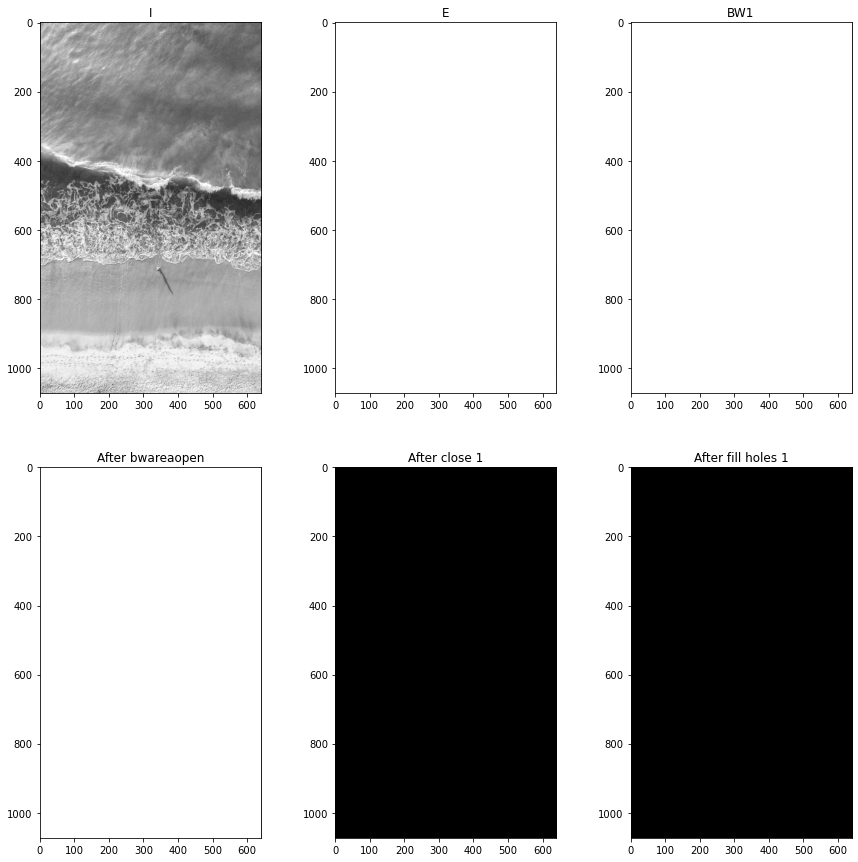

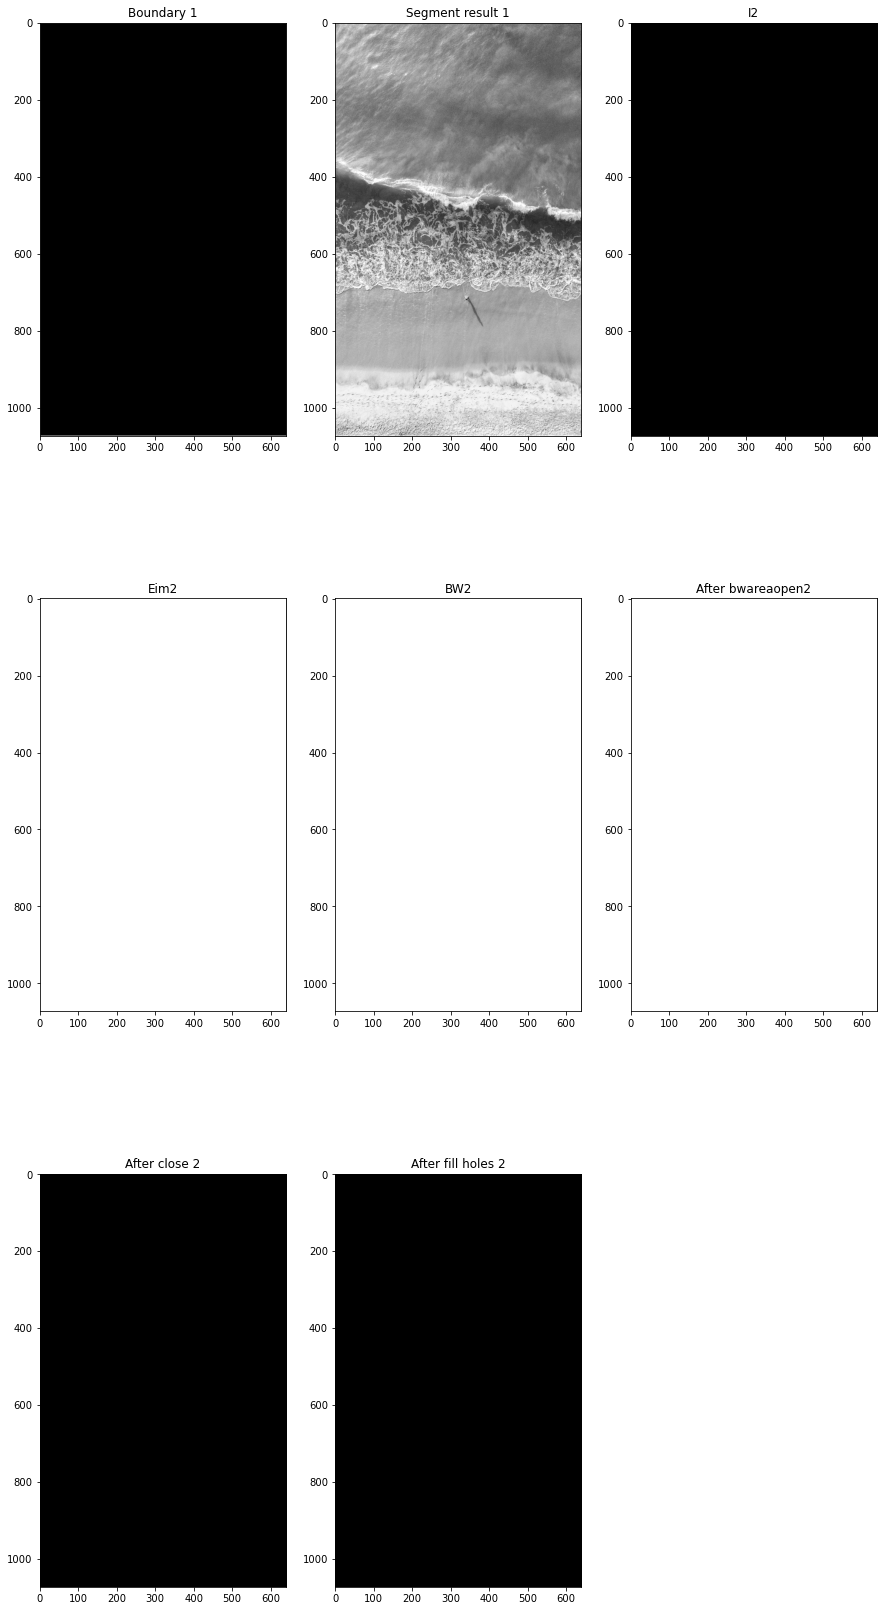

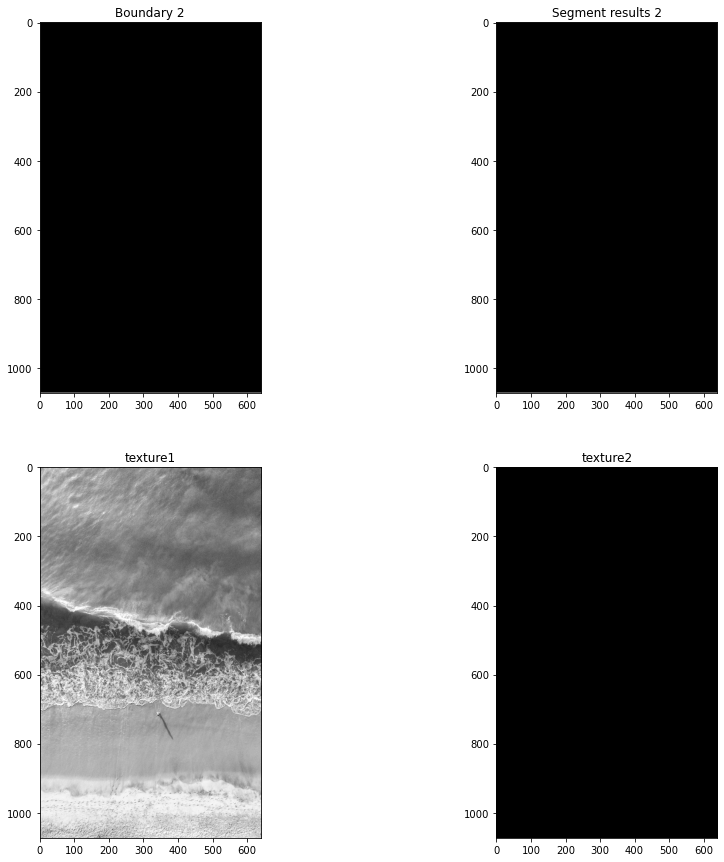

In [27]:
# plt.figure(figsize = (10,10))
# plt.subplot(131);plt.imshow(segmentedFrames[0]);plt.title('Dim1')
# plt.subplot(132);plt.imshow(segmentedFrames[1]);plt.title('Dim2')
# plt.subplot(133);plt.imshow(segmentedFrames[2]);plt.title('Dim3')
# plt.show()

def TextureSegmentation(fn="coast.png"):
    plt.figure(figsize = (15,15))
    img = cv.imread(fn, cv.IMREAD_COLOR)
    if not isinstance(img, np.ndarray) or img.data == None:
        print("Error reading file \"{}\"".format(fn))
        exit()

    # convery to grayscale
    I = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#     cv.imshow("I", I)
    plt.subplot(231);plt.imshow(I,cmap='gray');plt.title('I')
    #Entropy
#     E=skimage.filters.rank.entropy(I,skimage.morphology.square(9)).astype(np.float32)
    E=entropy(I,cv.getStructuringElement(cv.MORPH_RECT,(9,9))).astype(np.float32)
    Eim=(E-E.min())/(E.max()-E.min())
#     cv.imshow("E",Eim)
    plt.subplot(232);plt.imshow(Eim,cmap='gray');plt.title('E')

    #Binarization
    ret,BW1=cv.threshold(np.uint8(Eim*255),0,255,cv.THRESH_OTSU)
#     cv.imshow("BW1",BW1)
    plt.subplot(233);plt.imshow(BW1,cmap='gray');plt.title('BW1')

    #Cleanup
    BWao=bwareaopen(BW1,2000)
    nhood=cv.getStructuringElement(cv.MORPH_RECT,(9,9))
    closeBWao=cv.morphologyEx(BWao,cv.MORPH_CLOSE,nhood)
    Mask1=imfillholes(closeBWao)
#     cv.imshow("After bwareaopen",BWao)
#     cv.imshow("After close 1",closeBWao )
#     cv.imshow("After fill holes 1",Mask1 )
    plt.subplot(234);plt.imshow(BWao,cmap='gray');plt.title('After bwareaopen')
    plt.subplot(235);plt.imshow(closeBWao,cmap='gray');plt.title('After close 1')
    plt.subplot(236);plt.imshow(Mask1,cmap='gray');plt.title('After fill holes 1')
    plt.show()
    
    plt.figure(figsize = (15,30))
    #Select boundary
    contours,h=cv.findContours(Mask1,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
    boundary=np.zeros_like(Mask1)
    cv.drawContours(boundary,contours,-1,255,1)
#     cv.imshow("Boundary 1",boundary)
    plt.subplot(331);plt.imshow(boundary,cmap='gray');plt.title('Boundary 1')
    segmentResults=I.copy()
    segmentResults[boundary!=0]=255
#     cv.imshow("Segment results 1",segmentResults)
    plt.subplot(332);plt.imshow(segmentResults,cmap='gray');plt.title('Segment result 1')

    #The same for land
    I2=I.copy()
    I2[Mask1 !=0]=0
#     cv.imshow("I2",I2)
    plt.subplot(333);plt.imshow(I2,cmap='gray');plt.title('I2')

    #Entropy
#     E2 = skimage.filters.rank.entropy(I2, skimage.morphology.square(9)).astype(np.float32)
    E2=entropy(I2,cv.getStructuringElement(cv.MORPH_RECT,(9,9))).astype(np.float32)
    Eim2 = (E2 - E2.min()) / (E2.max() - E2.min())
#     cv.imshow("E2", Eim2)
    plt.subplot(334);plt.imshow(E2,cmap='gray');plt.title('Eim2')

    #Binarization
    ret, BW2 = cv.threshold(np.uint8(Eim2 * 255), 0, 255, cv.THRESH_OTSU)
#     cv.imshow("BW2", BW2)
    plt.subplot(335);plt.imshow(BW2,cmap='gray');plt.title('BW2')

    #Cleanup
    BW2ao = bwareaopen(BW2, 2000)
    nhood = cv.getStructuringElement(cv.MORPH_RECT, (9, 9))
    closeBW2ao = cv.morphologyEx(BW2ao, cv.MORPH_CLOSE, nhood)
    Mask2 = imfillholes(closeBW2ao)
#     cv.imshow("After bwareaopen2", BW2ao)
#     cv.imshow("After close 2", closeBW2ao)
#     cv.imshow("After fill holes 2", Mask2)
    plt.subplot(336);plt.imshow(BW2ao,cmap='gray');plt.title('After bwareaopen2')
    plt.subplot(337);plt.imshow(closeBW2ao,cmap='gray');plt.title('After close 2')
    plt.subplot(338);plt.imshow(Mask2,cmap='gray');plt.title('After fill holes 2')
    plt.show()

    
    plt.figure(figsize = (15,15))
    # Select boundary
    contours2, h = cv.findContours(Mask2, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    boundary2 = np.zeros_like(Mask2)
    cv.drawContours(boundary2, contours2, -1, 255, 1)
#     cv.imshow("Boundary 2", boundary2)
    plt.subplot(221);plt.imshow(boundary2,cmap='gray');plt.title('Boundary 2')
    segmentResults2 = I2.copy()
    segmentResults2[boundary2 != 0] = 255
#     cv.imshow("Segment results 2", segmentResults2)
    plt.subplot(222);plt.imshow(segmentResults2,cmap='gray');plt.title('Segment results 2')

    #Select Textures
    texture1=I.copy()
    texture1[Mask2==0]=0
    texture2=I.copy()
    texture2[Mask2 != 0] = 0
#     cv.imshow("Texture1",texture1)
#     cv.imshow("Texture2",texture2)
    plt.subplot(223);plt.imshow(texture1,cmap='gray');plt.title('texture1')
    plt.subplot(224);plt.imshow(texture2,cmap='gray');plt.title('texture2')
    plt.show()
#     cv.waitKey()
#     cv.destroyAllWindow()


TextureSegmentation("beach.jpg")